In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

/Users/kunwoosmac/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Q1

In [2]:
a = np.array([1,1,0])
b = np.array([2,-3,1])
c = np.array([-1,-1,-1])

angle1 = np.arccos(np.dot(a,c) / (np.linalg.norm(a) * np.linalg.norm(c)))

# find angle between a and c
print("a and c - angle in degree :", angle1*180/np.pi)

# find magnitude of b cross c
bcrossc = np.cross(b,c)
print("b cross c - magnitude :", np.linalg.norm(bcrossc))

# find unit vector of c
mag_c = np.linalg.norm(c)
unit_c = c/mag_c
print("unit c :", unit_c, ", magnitude of the vector :", np.linalg.norm(unit_c))

# find two vectors perpendicular to a as well as each other
perpen1 = np.cross(a,b)
perpen2 = np.cross(a, perpen1)
print("two vectors :", perpen1, perpen2)

a and c - angle in degree : 144.73561031724535
b cross c - magnitude : 6.48074069840786
unit c : [-0.57735027 -0.57735027 -0.57735027] , magnitude of the vector : 1.0
two vectors : [ 1 -1 -5] [-5  5 -2]


# Q2

In [3]:
# Solve system of linear equations

A = np.array([ [1,2,-1,0,1], [2,-1,1,-1,1], [5,3,6,-1,-1], [0,1,-8,7,10], [1,1,1,1,1] ])
b = np.array([10, -5, 0, 20, -8])
x = np.linalg.inv(A)@b
print("Answer :", x)

# Checking the answer
print("\nChecking the Answer\n")
for i in range(A.shape[0]):
    print("Substituting for the row{} in matrix A with vector x".format(i))
    print(np.dot(A[i,:], x).round(10) == b[i])

Answer : [ 24.44  -4.92 -19.28  15.64 -23.88]

Checking the Answer

Substituting for the row0 in matrix A with vector x
True
Substituting for the row1 in matrix A with vector x
True
Substituting for the row2 in matrix A with vector x
True
Substituting for the row3 in matrix A with vector x
True
Substituting for the row4 in matrix A with vector x
True


# Q3

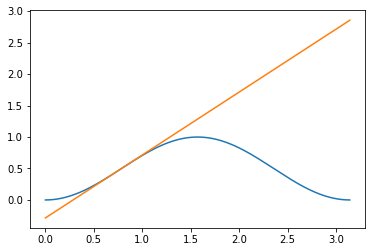

In [4]:
x = np.linspace(0,np.pi, 10000)
y = (np.sin(x))**2

# set x0 to pi/4
x0 = np.pi/4

original = (np.sin(x0))**2
first = 2*(np.sin(x0))*(np.cos(x0))

# approximation using first two terms
y2 = original + (x-x0)*first

# plot the original function and 2terms approximation
plt.plot(x, y)
plt.plot(x, y2)

# Q4

The function have 2 local minimas
First minima from fsolve: [-2.59485593]
Second minima from fsolve: [6.38835486]


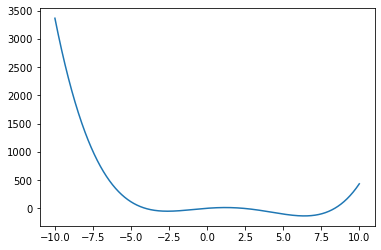

In [7]:
x = np.linspace(-10, 10, 1000)
y = (x**4)/4 - 5*(x**3)/3 - 12*(x**2)/2 + 20*x

plt.plot(x,y)
print("The function have 2 local minimas")

print("=" * 40)

# define function that returns the first derivative of y
def oneEquation(x):
    return x**3 - 5*(x**2) - 12*x + 20

# Check second derivative to check minima or maxima
second_der = 3*x**2 - 10*x - 12

# start the guess from -10
guess = -10
solution1 = fsolve(oneEquation, guess).round(10) 
    # give round as the computer calculates with iteration.

print("First minima from fsolve: {}". format(solution1))

# increase guess by 1, and when they find the new minima, break
while True:
    guess += 1
    solution2 = fsolve(oneEquation, guess).round(10)
    # if it is different from solution1
    if solution2 != solution1:
        # and the second derivative is positive
        if 3*(solution2)**2 - 10*(solution2) - 12 > 0:
            print("Second minima from fsolve: {}".format(solution2))
            break